In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

sys.path.append('../')

from circularcoordinates import CircCoordLn, weight_ft_0, weight_ft_with_degree_meta, weighted_circular_coordinate
from dataset import noisy_circle

In [2]:
_ = noisy_circle()
data, coord = [_[el] for el in ['data', 'coord']]
prime = 47

In [3]:
fts = [None] + [
    weight_ft_with_degree_meta(ft)
    for ft in [lambda x, y: 1 / (np.sqrt(x * y)),
               lambda x, y: 1 / (x + y)]
] + [weight_ft_0(2)]
results = [weighted_circular_coordinate(data, prime=prime, cocycle_n=0, weight_ft=ft) for ft in tqdm(fts)]
labels = ['Original', '1/sqrt(D0 D1)', '1/(D0 + D1)', 'WDGL']

100%|██████████| 4/4 [00:00<00:00,  8.55it/s]

0.09733715100927612


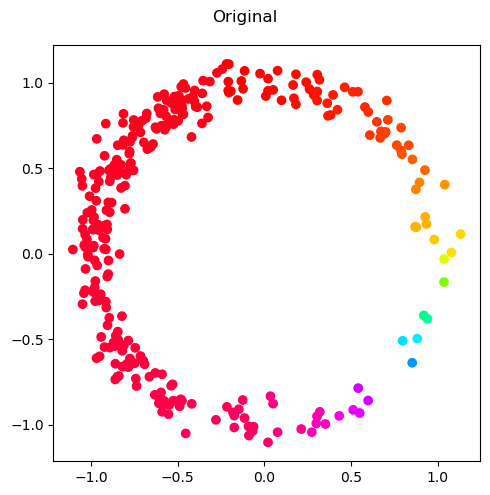

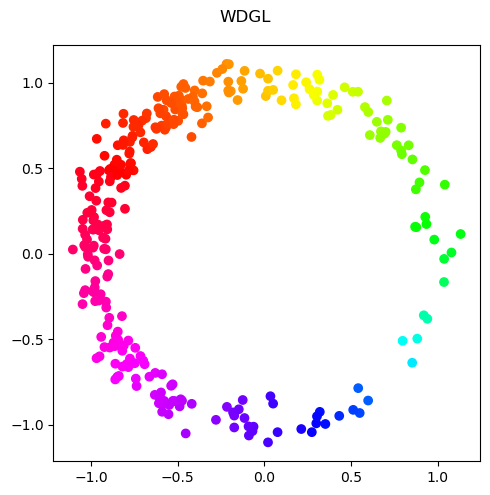

In [4]:
for i in [0, -1]:
    plt.figure(figsize=(5, 5))
    plt.scatter(*data.T, c=results[i], cmap='hsv')
    plt.suptitle(labels[i])
    plt.tight_layout()
    plt.show()
    plt.close()

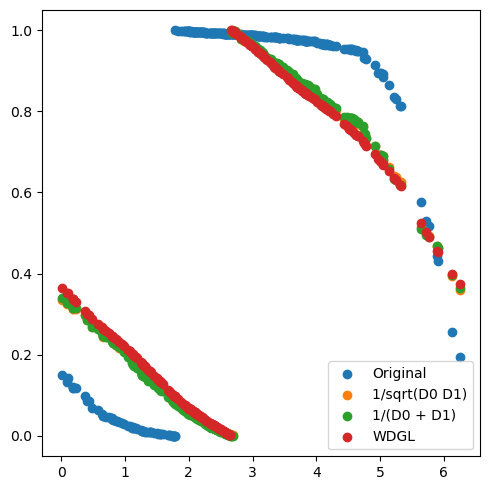

In [5]:
plt.figure(figsize=(5, 5))
for result, label in zip(results, labels):
    plt.scatter(coord, result, label=label)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

In [6]:
ccl = CircCoordLn(data, prime=prime)
ccl.setup(0)
ccl.cc_original()
ccl.f_reset_L2()
hyper_params = [
    {'epoch': 20, 'lr': 0.001, 'p_norm': 2},
    {'epoch': 200, 'lr': 0.05, 'p_norm': 4},
    {'epoch': 200, 'lr': 0.05, 'p_norm': 6},
    {'epoch': 200, 'lr': 0.05, 'p_norm': 10},
    {'epoch': 500, 'lr': 0.05, 'p_norm': 20},
]
lp_results = []
for param in hyper_params:
    lp_results.append(np.mod(ccl.cc_Lp(**param)[0], 1.0))
lp_results.append(np.mod(ccl.cc_Linf_Lp(3000, 0.0001, 0.001, 20, 25)[0], 1.0))
lp_results = np.mod(np.asarray(lp_results), 1.0)

100%|██████████| 3000/3000 [00:17<00:00, 172.08it/s, 0.15945 / 0.15945 / p = infty]         


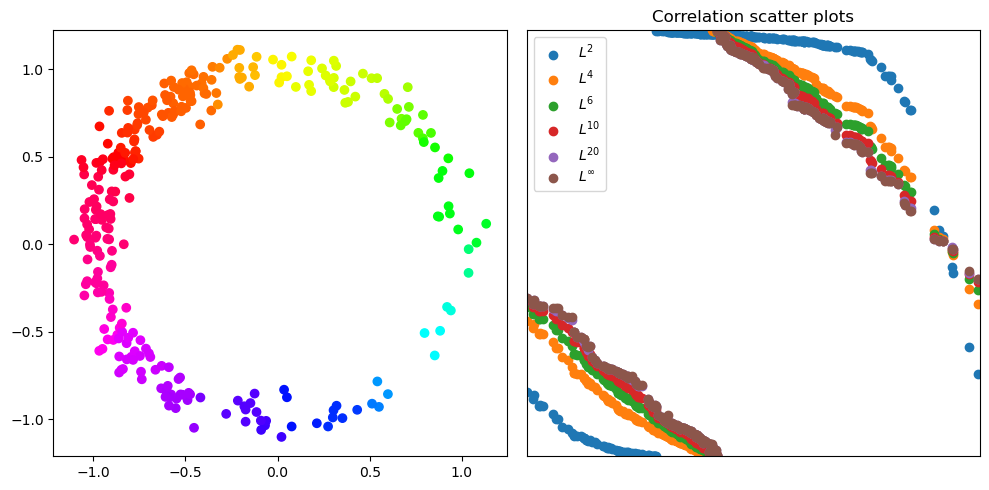

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(*data.T, c=lp_results[-1], cmap='hsv')
for result, label in zip(lp_results, [2, 4, 6, '{10}', '{20}', '\infty']):
    axs[1].scatter(coord, result, label=f'$L^{label}$')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlim(0, 2 * np.pi)
axs[1].set_ylim(0, 1)
plt.legend()
axs[1].set_title('Correlation scatter plots')
plt.tight_layout()
plt.show()
plt.close()

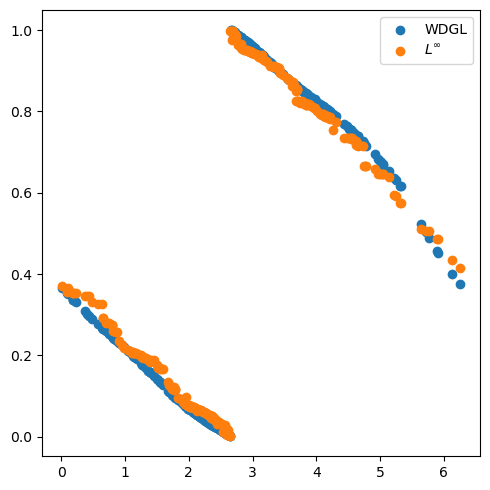

In [8]:
plt.figure(figsize=(5, 5))
plt.scatter(coord, results[-1], label=labels[-1])
plt.scatter(coord, lp_results[-1], label="$L^\infty$")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()